In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [48]:
data = pd.read_csv('salaries.csv')
#  print(data)
data_numeric = pd.DataFrame()
data_features = []

le = LabelEncoder()
for i in data.columns:
  if not i in  data.describe().columns:
    data[f'{i}_numeric'] = le.fit_transform(data[i])
    data_numeric[f'{i}_numeric'] = le.fit_transform(data[i])
    data_features.append(f'{i}_numeric')
  else:
    data_numeric[i] = data[i]
    data_features.append(i)

data_numeric_df = pd.DataFrame(data_numeric, index=data_numeric.index, columns=data_numeric.columns)

work_year
Coefficients: 
 [[22656.2987245]]
Mean squared error: 4077516470.59
Coefficient of determination: 0.04


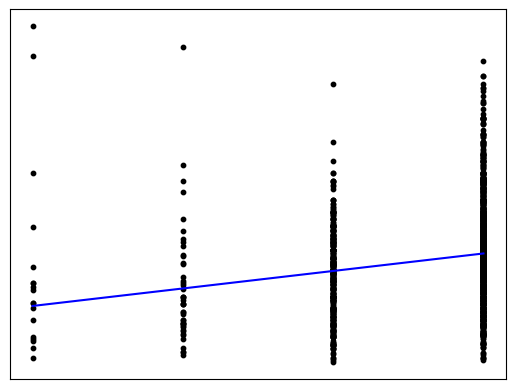

experience_level_numeric
Coefficients: 
 [[23743.79265306]]
Mean squared error: 3940475687.07
Coefficient of determination: 0.07


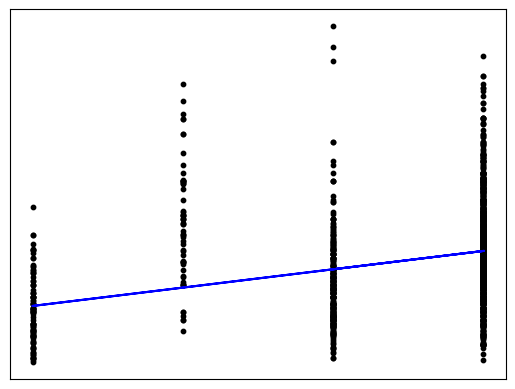

employment_type_numeric
Coefficients: 
 [[12783.99921654]]
Mean squared error: 4240747051.33
Coefficient of determination: -0.00


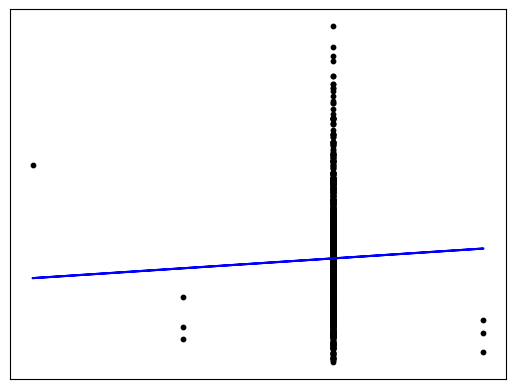

job_title_numeric
Coefficients: 
 [[473.36514874]]
Mean squared error: 3994566426.32
Coefficient of determination: 0.06


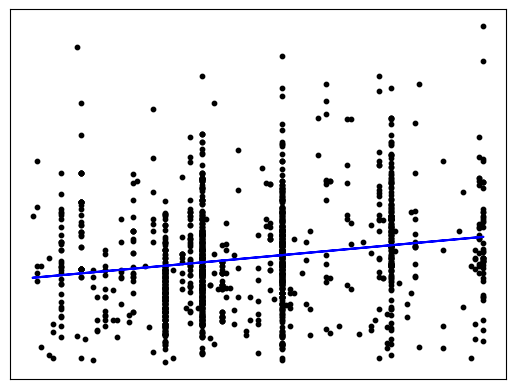

salary
Coefficients: 
 [[0.00350605]]
Mean squared error: 4219035268.92
Coefficient of determination: 0.00


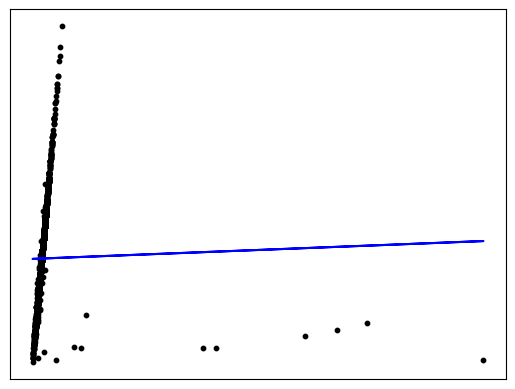

salary_currency_numeric
Coefficients: 
 [[6014.79230885]]
Mean squared error: 3671752067.72
Coefficient of determination: 0.13


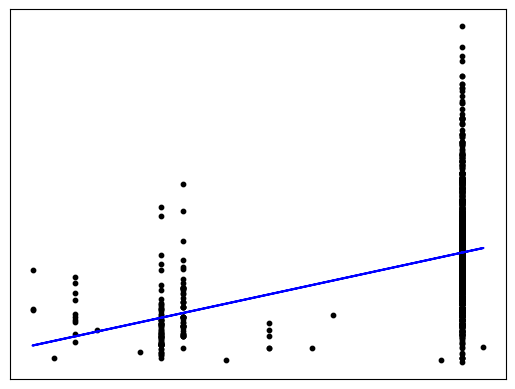

salary_in_usd
Coefficients: 
 [[1.]]
Mean squared error: 0.00
Coefficient of determination: 1.00


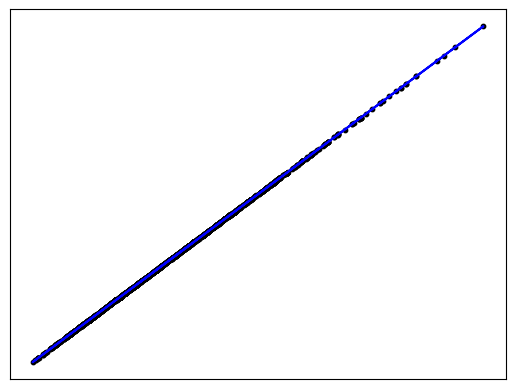

employee_residence_numeric
Coefficients: 
 [[1017.9698231]]
Mean squared error: 3779652067.55
Coefficient of determination: 0.11


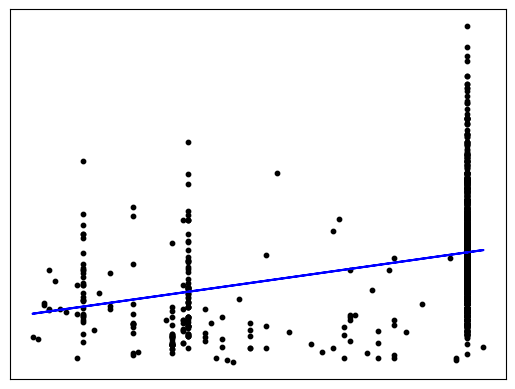

remote_ratio
Coefficients: 
 [[-137.48301416]]
Mean squared error: 4225896953.73
Coefficient of determination: 0.00


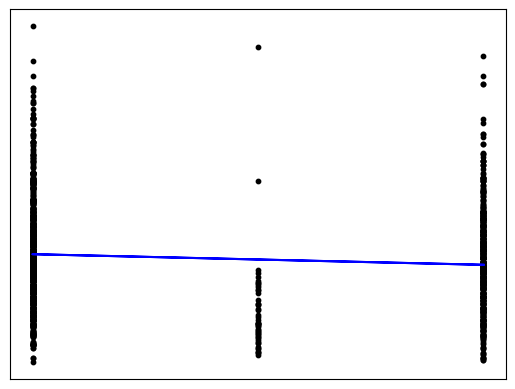

company_location_numeric
Coefficients: 
 [[1154.96367708]]
Mean squared error: 3785549127.97
Coefficient of determination: 0.11


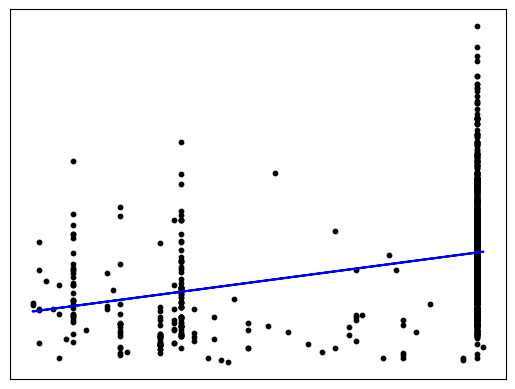

company_size_numeric
Coefficients: 
 [[1335.3861627]]
Mean squared error: 4235063528.65
Coefficient of determination: -0.00


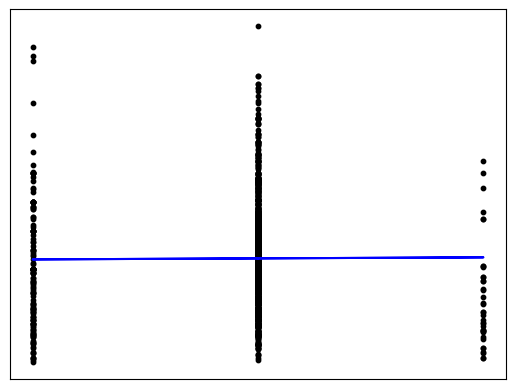

In [54]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


for i in data_features:
  print(i)
  if i == 'experience_level_numeric': pass
  X = data_numeric.iloc[:, data_numeric.columns==i]
  y = data_numeric.iloc[:, data_numeric.columns=='salary_in_usd']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
  regr = linear_model.LinearRegression()
  # X_train =X_train[:, np.newaxis, 2]
  # Train the model using the training sets

  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)

  # The coefficients
  print("Coefficients: \n", regr.coef_)
  # The mean squared error
  print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
  # The coefficient of determination: 1 is perfect prediction
  print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

  plt.scatter(X_test, y_test, color="black",s=10)
  plt.plot(X_test, y_pred, color="blue")

  plt.xticks(())
  plt.yticks(())

  plt.show()


Coefficients: 
 [[-167455.452237]]
Mean squared error: 74284790270.95
Coefficient of determination: -0.01


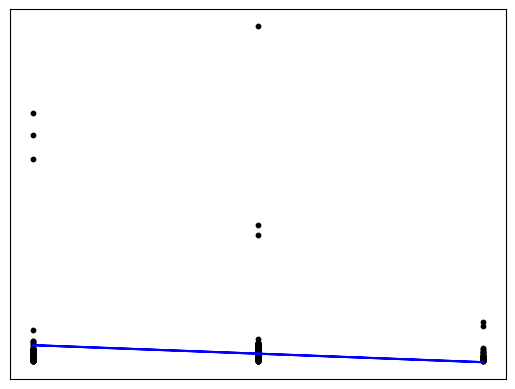

In [44]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
# X_train =X_train[:, np.newaxis, 2]
# Train the model using the training sets

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, color="black",s=10)
plt.plot(X_test, y_pred, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()
